In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss , accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from matplotlib import pyplot as plt

In [2]:
train_df = pd.read_csv("/Users/kato/jupyter/kaggle/house/train.csv" , index_col=0)
test_df = pd.read_csv("/Users/kato/jupyter/kaggle/house/test.csv" , index_col=0)
test_df2 = pd.read_csv("/Users/kato/jupyter/kaggle/house/test.csv")
ID = test_df2["Id"]

In [3]:
train_object = train_df.select_dtypes(include="object")

In [4]:
for i in train_object:
    lbl = LabelEncoder()
    train_object[i] = lbl.fit_transform(list(train_object[i].values))

In [5]:
train_object_droplist = train_object.columns.tolist()

In [6]:
train_df2 = train_df.drop(train_object_droplist, axis=1)

In [7]:
train_all = pd.merge(train_df2 , train_object, on="Id" , how="left")

In [8]:
train_all = train_all.fillna(train_all.mean())

In [9]:
test_object = test_df.select_dtypes(include="object")

In [10]:
for j in test_object:
    lbl = LabelEncoder()
    test_object[j] = lbl.fit_transform(list(test_object[j].values))

In [11]:
test_object_droplist = test_object.columns.tolist()

In [12]:
test_df3 = test_df.drop(test_object_droplist, axis=1)

In [13]:
test_all = pd.merge(test_df3 , test_object, on="Id" , how="left")

In [14]:
test_all = test_all.fillna(test_all.mean())

In [15]:
X = train_all.drop(columns="SalePrice")
y = train_all["SalePrice"]

In [16]:
params = {
    "learning_rate" : [0.2 , 0.4 , 0.6 , 0.8 , 1.0],
    "max_depth" : [1 , 2 , 3 , 4 , 5],
    "min_child_weight" : [0.2 , 0.4 , 0.6 , 0.8 , 1.0]
}

In [17]:
grid_search = GridSearchCV(XGBRegressor() , param_grid=params , cv=5)

In [18]:
X_train , X_test , y_train ,y_test = train_test_split(X , y , shuffle=True , random_state=0)

In [19]:
grid_search.fit(X_train , y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_child_weight': [0.2, 0.4, 0.6, 0.8, 1.0]})

In [20]:
print(grid_search.score(X_train , y_train))
print(grid_search.score(X_test , y_test))

0.9969771989882965
0.8439891230528695


In [21]:
print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 0.2}
0.8688802174149306
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0.2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [22]:
model = xgb.XGBRegressor(learning_rate=grid_search.best_params_["learning_rate"],
                           max_depth=grid_search.best_params_["max_depth"],
                           min_child_weight=grid_search.best_params_["min_child_weight"],
                           random_state=60)

In [23]:
model.fit(X_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=0.2, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=60, ...)

In [24]:
print(model.score(X_train , y_train))
print(model.score(X_test , y_test))

0.9969771989882965
0.8439891230528695


In [25]:
pred = model.predict(test_all)

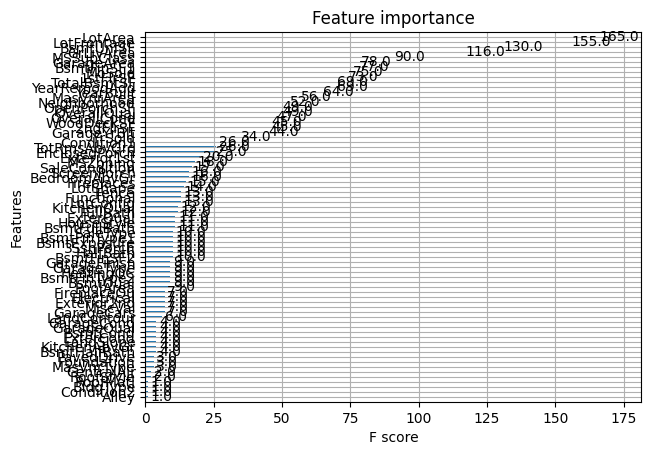

In [26]:
plot_importance(model)
plt.show()

In [27]:
submission = pd.DataFrame({
    "Id":ID,
    "SalePrice":pred
})

In [28]:
submission.to_csv("/Users/kato/jupyter/kaggle/house/0603-2_house.csv" , index=False)